1. [x] load data from condition 1 to 3 in experiment 1
2. [x] Get PARSER and rational chunker to learn from this data
3. [x] Compute correlation and similarity measure on top of the results
4. [x] Look for best fitting parameter for rational chunker, PARSER and associative learner


rational chunker parameters: w and nit: learn_sequence(w = 0, nit = 4)

PARSER parameters: forgetting_decrement, percept_increment: PARSER(speech, forgetting_decrement = 0.05, percept_increment = 0.5)

associative learning components: theta: associative_learning(seq, theta=1)

In [1]:
import pickle
import pandas as pd
import numpy as np
with open('../data/modelcomparison.pkl', 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame.from_dict(data)

In [2]:
ws = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10]#[0.1,0.2,0.3,0.4,0.5,0.6]
forgetting_decrements = [0.06,0.07,0.08]
percept_increment = [0.5,0.7,1.0]
thetas = [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0]

In [3]:
from PARSER import *
from utils import *
from associative_learning import *

In [ ]:
dfsubject = pd.read_csv('../Data/filtered_exp1.csv')

data = {}
data['id'] = []

for w in ws: 
    name = 'rational_chunking_p w = ' + str(w)
    data[name] = []
    name = 'rational_chunking_rt w = ' + str(w)
    data[name] = []
    
    
for fd in forgetting_decrements:
    for pi in percept_increment:   
        name = 'parser_p forgetting_decrement = ' + str(fd) + ' percept_increment = ' + str(pi)
        data[name] = []
        name = 'parser_log_p forgetting_decrement = ' + str(fd) + ' percept_increment = ' + str(pi)
        data[name] = []



for theta in thetas:
    name = 'associative_learner_p theta = ' + str(theta)
    data[name] = []
    name = 'associative_learning_log_p theta = ' + str(theta)
    data[name] = []


data['seq'] = []
data['cond'] = []
data['subject_rt'] = []


for cond in [0,1,2]:
    for subj in np.unique(dfsubject[dfsubject['condition'] == cond]['id']):
        print('subj ', subj)
        
        subseq = []
        for press in list(dfsubject[dfsubject['id'] == subj]['userpress']):
            if press == list(dfsubject[dfsubject['id'] == subj]['keyassignment'])[0][2]:
                subseq.append(1)
            if press == list(dfsubject[dfsubject['id'] == subj]['keyassignment'])[0][7]:
                subseq.append(2)
            if press == list(dfsubject[dfsubject['id'] == subj]['keyassignment'])[0][12]:
                subseq.append(3)
            if press == list(dfsubject[dfsubject['id'] == subj]['keyassignment'])[0][17]:
                subseq.append(4)
        seq = subseq[:800]
        
        # only record data during training 
        data['id'] += [subj]*600
        data['subject_rt'] += list(dfsubject[dfsubject['id'] == subj]['timecollect'])[200:800]
        data['seq'] += seq[200:]
        data['cond'] += [cond]*600

        ########## Use rational chunking model to learn from chunks ###########
        # store learned data like list of tuples 
        
        
        for this_w in ws: 

            this_sequence = seq
            i = 200
            step = 10
            precord = []
            rtrecord = []
            # go through the sequence 10 units at a time
            while i<=800:    
                M,T,bagofchunk,rt,correctness,cp,reacted_press  = learn_sequence(this_sequence[0:i], Print = False, w = this_w)
                correctness, rt, choice_probability,reacted_press,this_M, this_T = partition_seq_hastily(this_sequence,bagofchunk)
                rtrecord = rtrecord + rt[i:i+step]
                precord = precord + choice_probability[i:i+step]
                i = i + step
            
            data['rational_chunking_p w = ' + str(this_w)] += precord
            data['rational_chunking_rt w = ' + str(this_w)] += rtrecord
        

        
        for fd in forgetting_decrements:
            for pi in percept_increment:   
                name = 'parser_p forgetting_decrement = ' + str(fd) + ' percept_increment = ' + str(pi)
                # parse sequence based on the learned chunks
                # generate probability evaluation based on chunk record
                p_parser = PARSER_probability(seq[200:800],forgetting_decrement = fd, percept_increment = pi)
                data[name] += p_parser
                neglogp = list(-np.log(p_parser))
                name = 'parser_log_p forgetting_decrement = ' + str(fd) + ' percept_increment = ' + str(pi)
                data[name] +=neglogp

        for theta in thetas:            
            name = 'associative_learner_p theta = ' + str(theta)
            p_associative_learning = associative_learning(seq[200:800],theta = theta)
            data[name] += p_associative_learning

            neglogp = list(-np.log(p_associative_learning))
            name = 'associative_learning_log_p theta = ' + str(theta)
            data[name] += neglogp


        with open('../data/modelcomparisonfinegrained.pkl', 'wb') as f:
            pickle.dump(data, f)
            
            
df = pd.DataFrame.from_dict(data)
df.to_csv('../data/modelcomparisonfinegrained.csv')  

subj  2
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
subj  4
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
subj  6
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Percept Shaper (with chunk weights): 
Final Pe

In [26]:
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
import math 
dfchunking = {}# model comparison dataframe
dfchunking['condition'] = []
dfchunking['parameter'] = []
dfchunking['spearmanr'] = []
dfchunking['id'] = []


dfparser = {}
dfparser['condition'] = []
dfparser['forgetting decrement'] = []
dfparser['percept increment'] = []
dfparser['spearmanr'] = []
dfparser['id'] = []

dfal = {}
dfal['condition'] = []
dfal['parameter'] = []
dfal['spearmanr'] = []
dfal['id'] = []

for cond in [0,1,2]:
    for ID in np.unique(dfsubject[dfsubject['condition'] == cond]['id']):
        rt_subj = list(df[(df['id'] == ID) & (df['subject_rt'] <=1000) & (df['cond'] == cond)]['subject_rt'])
        
        for w in ws: 
            name = 'rational_chunking_rt w = ' + str(w)            
            rt_rationalmodel = df[(df['cond'] == cond) & (df['subject_rt'] <=1000) & (df['id'] == ID)][name]
            corr_rational_chunking, p_rational_chunking = spearmanr(rt_subj, rt_rationalmodel,nan_policy = 'omit')
            dfchunking['condition'].append(cond)
            dfchunking['parameter'].append(w)
            dfchunking['spearmanr'].append(corr_rational_chunking)
            dfchunking['id'].append(ID)
            
        for fd in forgetting_decrements:
            for pi in percept_increment:   
                name = 'parser_log_p forgetting_decrement = ' + str(fd) + ' percept_increment = ' + str(pi)
                rt_parser = df[(df['cond'] == cond) & (df['subject_rt'] <=1000) & (df['id'] == ID)][name]
                corr_parser, p_parser = spearmanr(rt_subj, rt_parser,nan_policy = 'omit')
                dfparser['condition'].append(cond)
                dfparser['forgetting decrement'].append(fd)
                dfparser['percept increment'].append(pi)
                dfparser['id'].append(ID)
                dfparser['spearmanr'].append(corr_parser)
                
                
        for theta in thetas:
            name = 'associative_learning_log_p theta = ' + str(theta)
            rt_associative_learning = df[(df['cond'] == cond) & (df['subject_rt'] <=1000) & (df['id'] == ID)][name]
            corr_associative_learning, p_associative_learning = spearmanr(rt_associative_learning, rt_subj, nan_policy = 'omit')
            dfal['condition'].append(cond)
            dfal['parameter'].append(theta)
            dfal['spearmanr'].append(corr_associative_learning)
            dfal['id'].append(ID)

In [27]:
dfchunking = pd.DataFrame.from_dict(dfchunking)
dfparser = pd.DataFrame.from_dict(dfparser)
dfal = pd.DataFrame.from_dict(dfal)

In [47]:
for w in ws: 
    print('w = ',w)
    print('rational chunking correlation: %.3f' % (np.mean(dfchunking[(dfchunking['parameter'] == w)]['spearmanr'])))

for fd in forgetting_decrements:
    for pi in percept_increment:  
        print('pi = ', pi)
        print('fd = ', fd)
        print('PARSER correlation: %.3f' % (np.mean(dfparser[(dfparser['forgetting decrement'] == fd) & (dfparser['percept increment'] == pi) ]['spearmanr'])))

for theta in thetas:
    print('theta = ', theta)
    print('associative learning correlation: %.3f' % (np.mean(dfal[(dfal['parameter'] == theta)]['spearmanr'])))



w =  0.1
rational chunking correlation: 0.206
w =  0.2
rational chunking correlation: 0.203
w =  0.3
rational chunking correlation: 0.184
w =  0.4
rational chunking correlation: 0.151
w =  0.5
rational chunking correlation: 0.133
w =  0.6
rational chunking correlation: 0.116
pi =  0.5
fd =  0.03
PARSER correlation: 0.100
pi =  1.0
fd =  0.03
PARSER correlation: 0.088
pi =  1.5
fd =  0.03
PARSER correlation: 0.097
pi =  0.5
fd =  0.04
PARSER correlation: 0.083
pi =  1.0
fd =  0.04
PARSER correlation: 0.076
pi =  1.5
fd =  0.04
PARSER correlation: 0.085
pi =  0.5
fd =  0.05
PARSER correlation: 0.085
pi =  1.0
fd =  0.05
PARSER correlation: 0.086
pi =  1.5
fd =  0.05
PARSER correlation: 0.099
pi =  0.5
fd =  0.06
PARSER correlation: 0.078
pi =  1.0
fd =  0.06
PARSER correlation: 0.107
pi =  1.5
fd =  0.06
PARSER correlation: 0.093
pi =  0.5
fd =  0.07
PARSER correlation: 0.101
pi =  1.0
fd =  0.07
PARSER correlation: 0.077
pi =  1.5
fd =  0.07
PARSER correlation: 0.089
theta =  0.7
associ

In [34]:
for cond in [0,1,2]:
    print('condition = ', cond)
    for w in ws: 
        print('w = ',w)
        print('rational chunking correlation: %.3f' % (np.mean(dfchunking[(dfchunking['parameter'] == w) & (dfchunking['condition'] == cond)]['spearmanr'])))

    for fd in forgetting_decrements:
        for pi in percept_increment:  
            print('pi = ', pi)
            print('fd = ', fd)
            print('PARSER correlation: %.3f' % (np.mean(dfparser[(dfparser['condition'] == cond) & (dfparser['forgetting decrement'] == fd) & (dfparser['percept increment'] == pi) ]['spearmanr'])))

    for theta in thetas:
        print('theta = ', theta)
        print('associative learning correlation: %.3f' % (np.mean(dfal[(dfal['condition'] == cond) & (dfal['parameter'] == theta)]['spearmanr'])))


condition =  0
w =  0.1
rational chunking correlation: 0.054
w =  0.2
rational chunking correlation: 0.050
w =  0.3
rational chunking correlation: 0.027
w =  0.4
rational chunking correlation: 0.006
w =  0.5
rational chunking correlation: 0.004
w =  0.6
rational chunking correlation: 0.008
pi =  0.5
fd =  0.03
PARSER correlation: 0.014
pi =  1.0
fd =  0.03
PARSER correlation: -0.005
pi =  1.5
fd =  0.03
PARSER correlation: 0.024
pi =  0.5
fd =  0.04
PARSER correlation: -0.002
pi =  1.0
fd =  0.04
PARSER correlation: 0.010
pi =  1.5
fd =  0.04
PARSER correlation: -0.009
pi =  0.5
fd =  0.05
PARSER correlation: -0.010
pi =  1.0
fd =  0.05
PARSER correlation: -0.002
pi =  1.5
fd =  0.05
PARSER correlation: 0.008
pi =  0.5
fd =  0.06
PARSER correlation: 0.010
pi =  1.0
fd =  0.06
PARSER correlation: 0.011
pi =  1.5
fd =  0.06
PARSER correlation: -0.002
pi =  0.5
fd =  0.07
PARSER correlation: 0.026
pi =  1.0
fd =  0.07
PARSER correlation: -0.008
pi =  1.5
fd =  0.07
PARSER correlation: 0.0

In [25]:
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
import math 
# seed random number generator
dfrt = {}
dfrt['ID'] = []
dfrt['rt'] = []
dfrt['lgpparser'] = []
dfrt['lgprational_chunking'] = []
dfrt['sim_rt_rational_chunking'] = []


seed(1)
c_parser = []
lgpparser = []
c_rational_chunking = []
lgprational_chunking = []

c_sim_rational_chunking = []

for cond in [0,1,2]:
    for ID in np.unique(dfsubject[dfsubject['condition'] == cond]['id']):
        rt_rationalmodel = list(-np.log(np.array(df[(df['cond'] == cond) & (df['subject_rt'] <=1000) & (df['id'] == ID)]['rational_chunking_p'])))
        rt_rationalmodelsim = list(np.array(df[(df['cond'] == cond) & (df['subject_rt'] <=1000) & (df['id'] == ID)]['rational_chunking_rt']))
        rt_parser = list(-np.log(np.array(df[(df['cond'] == cond) & (df['id'] == ID) & (df['subject_rt'] <=1000)]['parser_p'])))
        rt_subj = list(df[(df['id'] == ID) & (df['subject_rt'] <=1000) & (df['cond'] == cond)]['subject_rt'])
        
        corr_rational_chunking, p_rational_chunking = spearmanr(rt_subj, rt_rationalmodel)
        corr_sim_rational_chunking, p_sim_rational_chunking = spearmanr(rt_subj, rt_rationalmodelsim)
        corr_parser, p_parser = spearmanr(rt_parser, rt_subj)
        
        lgpparser += rt_parser
        lgprational_chunking += rt_rationalmodel
        
        dfrt['rt']+=rt_subj
        dfrt['ID']+= [ID]*len(rt_subj)
        dfrt['lgpparser'] += rt_parser
        dfrt['lgprational_chunking'] += rt_rationalmodel
        dfrt['sim_rt_rational_chunking'] += rt_rationalmodelsim



        if not math.isnan(p_parser):
            c_parser.append(corr_parser)
        if not math.isnan(p_rational_chunking):
            c_rational_chunking.append(corr_rational_chunking)
        if not math.isnan(p_sim_rational_chunking):
            c_sim_rational_chunking.append(corr_sim_rational_chunking)
            
dfrt = pd.DataFrame.from_dict(dfrt)

dfrt.to_csv('../data/modelcomparison.csv')  

KeyError: 'rational_chunking_p'

In [37]:
df

,id,rational_chunking_p w = 0.1,rational_chunking_rt w = 0.1,rational_chunking_p w = 0.2,rational_chunking_rt w = 0.2,rational_chunking_p w = 0.3,rational_chunking_rt w = 0.3,rational_chunking_p w = 0.4,rational_chunking_rt w = 0.4,rational_chunking_p w = 0.5,...,associative_learning_log_p theta = 0.7,associative_learner_p theta = 0.8,associative_learning_log_p theta = 0.8,associative_learner_p theta = 0.9,associative_learning_log_p theta = 0.9,associative_learner_p theta = 1,associative_learning_log_p theta = 1,seq,cond,subject_rt
0,2,1.000000,4,1.000000,5,1.000000,4,1.000000,4,1.000000,...,1.386294,0.250000,1.386294,0.250000,1.386294,0.250000,1.386294,3,0,1305
1,2,0.349398,5,0.349398,5,0.349398,4,0.349398,5,0.357143,...,-0.000000,1.000000,-0.000000,1.000000,-0.000000,1.000000,-0.000000,3,0,431
2,2,0.387879,6,0.387879,6,0.387879,6,0.387879,6,1.000000,...,-0.000000,1.000000,-0.000000,1.000000,-0.000000,1.000000,-0.000000,3,0,385
3,2,0.387879,4,0.387879,5,0.387879,5,0.387879,4,0.345070,...,0.993252,0.357143,1.029619,0.344828,1.064711,0.333333,1.098612,4,0,482
4,2,0.385542,4,0.385542,4,0.385542,4,0.385542,4,0.313043,...,-0.000000,1.000000,-0.000000,1.000000,-0.000000,1.000000,-0.000000,1,0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85195,142,0.474227,6,0.474227,5,0.474227,5,0.474227,5,0.474227,...,1.098612,0.333331,1.098618,0.332937,1.099802,0.315436,1.153799,4,2,400
85196,142,0.474227,5,0.474227,5,0.474227,5,0.474227,5,0.474227,...,1.098612,0.333331,1.098620,0.332849,1.100065,0.313333,1.160488,3,2,596
85197,142,0.472727,4,0.472727,4,0.472727,4,0.472727,4,0.472727,...,1.324357,0.278809,1.277229,0.304460,1.189216,0.364341,1.009665,4,2,418
85198,142,0.474227,5,0.474227,5,0.474227,5,0.474227,5,0.474227,...,1.098612,0.333332,1.098617,0.333007,1.099590,0.317881,1.146079,4,2,367


In [35]:
import rpy2
%load_ext rpy2.ipython

In [41]:
for w in ws: 
    name = 'rational_chunking_rt w = ' + str(w)            
    tempdf = df[(df['cond'] == cond) & (df['subject_rt'] <=1000) & (df['id'] == ID)][name]


In [46]:
df.keys()

Index(['id', 'rational_chunking_p w = 0.1', 'rational_chunking_rt w = 0.1',
       'rational_chunking_p w = 0.2', 'rational_chunking_rt w = 0.2',
       'rational_chunking_p w = 0.3', 'rational_chunking_rt w = 0.3',
       'rational_chunking_p w = 0.4', 'rational_chunking_rt w = 0.4',
       'rational_chunking_p w = 0.5', 'rational_chunking_rt w = 0.5',
       'rational_chunking_p w = 0.6', 'rational_chunking_rt w = 0.6',
       'parser_log_p forgetting_decrement = 0.03 percept_increment = 0.5',
       'parser_log_p forgetting_decrement = 0.03 percept_increment = 1.0',
       'parser_log_p forgetting_decrement = 0.03 percept_increment = 1.5',
       'parser_log_p forgetting_decrement = 0.04 percept_increment = 0.5',
       'parser_log_p forgetting_decrement = 0.04 percept_increment = 1.0',
       'parser_log_p forgetting_decrement = 0.04 percept_increment = 1.5',
       'parser_log_p forgetting_decrement = 0.05 percept_increment = 0.5',
       'parser_log_p forgetting_decrement = 0.05 

In [45]:
%%R -i df -o betashcm

library(lme4)
library(lmerTest)
m1<-lmer('subject_rt ~ scale(rational_chunking_p w = 0.1) + (scale(rational_chunking_p w = 0.1) |ID)', data=df[!is.infinite(df$rational_chunking_p w = 0.1),])
betashcm<-summary(m1)

RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR

In [63]:
%%R -i dfrt -o betashcm
library(lme4)
library(lmerTest)
m1<-lmer('rt ~ scale(lgprational_chunking) + (scale(lgpparser) |ID)', data=dfrt[!is.infinite(dfrt$lgpparser),])
betashcm<-summary(m1)
print(summary(m1))
#calculate BIC of model1
print(AIC(m1))
print(BIC(m1))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "rt ~ scale(lgprational_chunking) + (scale(lgpparser) |ID)"
   Data: dfrt[!is.infinite(dfrt$lgpparser), ]

REML criterion at convergence: 955580.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.0703 -0.5900 -0.1113  0.4971  6.0332 

Random effects:
 Groups   Name             Variance Std.Dev. Corr 
 ID       (Intercept)      27495.7  165.8         
          scale(lgpparser)   265.8   16.3    -0.09
 Residual                  11507.7  107.3         
Number of obs: 78287, groups:  ID, 142

Fixed effects:
                             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                 5.513e+02  1.387e+01 1.409e+02   39.76   <2e-16 ***
scale(lgprational_chunking) 2.003e+01  5.092e-01 7.592e+04   39.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scl(lgprt_) -0.006
[1] 

In [64]:
%%R -i dfrt -o betashcm
library(lme4)
library(lmerTest)
m1<-lmer('rt ~ scale(sim_rt_rational_chunking) + (scale(sim_rt_rational_chunking) |ID)', data=dfrt)
betashcm<-summary(m1)
print(summary(m1))
#calculate BIC of model1
print(AIC(m1))
print(BIC(m1))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
"rt ~ scale(sim_rt_rational_chunking) + (scale(sim_rt_rational_chunking) |ID)"
   Data: dfrt

REML criterion at convergence: 956289.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.3969 -0.5885 -0.1082  0.4980  6.2611 

Random effects:
 Groups   Name                            Variance Std.Dev. Corr 
 ID       (Intercept)                     26691.4  163.37        
          scale(sim_rt_rational_chunking)   402.4   20.06   -0.24
 Residual                                 11471.6  107.11        
Number of obs: 78366, groups:  ID, 142

Fixed effects:
                                Estimate Std. Error      df t value Pr(>|t|)
(Intercept)                      548.093     13.719 140.882   39.95   <2e-16
scale(sim_rt_rational_chunking)   20.328      1.757 141.272   11.57   <2e-16
                                   
(Intercept)                     ***
scale(sim_rt_rational_chunkin

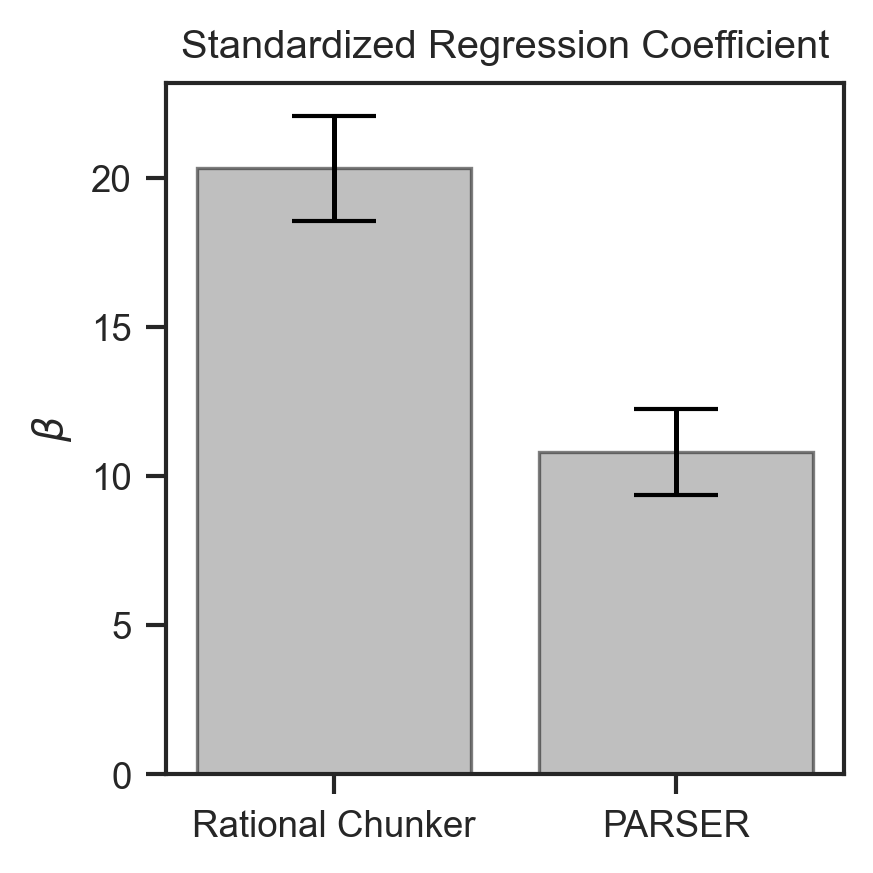

In [65]:
crational_chunking_mean = 20.32
cparser_mean = 10.81

# Calculate the standard deviation
crationalchunking_stde = 1.76
cparser_stde = 1.44
import seaborn as sns

sns.set_style("ticks")
sns.set_context("paper")


# Create lists for the plot
Type = ['Our Model','PARSER']
x_pos = np.arange(len(Type))
CTEs = [crational_chunking_mean,cparser_mean]
error = [crationalchunking_stde,cparser_stde]
# plt.figure(figsize = (10,5), dpi = 300)
# Build the plot
fig, ax = plt.subplots(figsize = (3,3), dpi = 300)
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black',edgecolor = 'k', color = ['gray','gray'], capsize=10)
ax.set_title('Standardized Regression Coefficient')
ax.set_ylabel(r'$\beta$')
ax.set_xticks(x_pos)
ax.set_xticklabels(Type)
#ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()